In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload

%autoreload 2

%matplotlib notebook
sns.set()

In [4]:
import galsim
import descwl

In [36]:
pars = descwl.survey.Survey.get_defaults(
    survey_name='DES',
    filter_band='i')

In [37]:
pars

{'atmospheric_psf_beta': 0.0,
 'atmospheric_psf_e1': 0.0,
 'atmospheric_psf_e2': 0.0,
 'cosmic_shear_g1': 0.0,
 'cosmic_shear_g2': 0.0,
 'airmass': 1.0,
 'mirror_diameter': 3.934,
 'effective_area': 10.014,
 'image_width': 3115,
 'image_height': 3115,
 'pixel_scale': 0.263,
 'exposure_time': 1000.0,
 'sky_brightness': 20.5,
 'zenith_psf_fwhm': 0.96,
 'zero_point': 13.94,
 'extinction': 0.05,
 'survey_name': 'DES',
 'filter_band': 'i',
 'psf_model': galsim.Gaussian(sigma=0.3821948101296086, flux=1.0, gsparams=galsim.GSParams(128,8192,0.005,5.0,0.001,1e-05,1e-05,1,0.0001,1e-06,1e-06,1e-08,1e-05))}

In [38]:
pars['survey_name'] = 'DES'
pars['filter_band'] = 'i'
pars['image_width'] = 225
pars['image_height'] = 225
pars['psf_model'] = galsim.Gaussian(fwhm=0.9)
pars['exposure_time'] = 90

In [39]:
survey = descwl.survey.Survey(**pars)

In [40]:
builder = descwl.model.GalaxyBuilder(
    survey=survey,
    no_disk=False,
    no_bulge=False,
    no_agn=False,
    verbose_model=False)

In [41]:
import fitsio
rng = np.random.RandomState(seed=10)

cat = fitsio.read('/Users/Matt/Desktop/OneDegSq.fits')
cat['pa_disk'] = rng.uniform(low=0.0, high=360.0, size=cat.size)
cat['pa_bulge'] = cat['pa_disk']
cat_indices = np.arange(cat.size)

26.9435119629


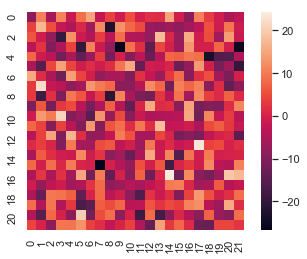

In [49]:
gal = builder.from_catalog(cat[4315], 0, 0, survey.filter_band)

print(gal.ab_magnitude)

img = galsim.Convolve(gal.model, pars['psf_model']).drawImage(scale=0.263)

implot = img.array + rng.normal(size=img.array.shape) * np.sqrt(survey.mean_sky_level) / np.sqrt(30)

plt.figure()
sns.heatmap(implot, square=True)

In [46]:
np.sqrt(survey.mean_sky_level)

47.011963477856085